## Assignment 4

### Moldir Kumarbek BD2005

# K-means

Foreword:
Will implement K-means clustering and use it to compress images. We'll start with a simple 2D dataset to understand how K-means works, and then we'll apply it to image compression. We'll also experiment with principal component analysis and see how it can be used to find low-dimensional representations of face images.

Implementation principle:
We will implement and apply K-means to a simple 2D dataset to get some intuition of how it works. K-means is an iterative, unsupervised clustering algorithm that groups similar instances into clusters. The algorithm starts by guessing the initial cluster center for each cluster, then repeatedly assigns instances to the nearest cluster and recalculates the cluster center for that cluster.

The first part we want to implement is a function that finds the closest cluster center for each instance in the data.

first part:
The first part we want to implement is a function that finds the closest cluster center for each instance in the data.

Let's test this function to make sure it's working correctly. We will use the test cases provided in the exercise.

In [23]:
import scipy.io
import numpy as np
df = scipy.io.loadmat('ex7data2.mat')

In [24]:
# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
X = df['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])



In [25]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)
    return idx

In [26]:
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')


Closest centroids for the first 3 examples:
[[0.]
 [2.]
 [1.]]
(the closest centroids should be 0, 2, 1 respectively)


Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specically, for every centroid k we set

 
 
where  is the set of examples that are assigned to centroid k. Concretely, if two examples say  and  are assigned to centroid k = 2, then you should update 
 
.

You should now complete the code in computeCentroids. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

Once you have completed the code in computeCentroids.m, the script will run your code and output the centroids after the first step of K-means.

In [27]:
K = 3

In [28]:
def computeCentroids(X, idx, K):
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    return centroids/count

The output matches the expected value in the text (our array is zero-indexed instead of one-indexed, so the value is 1 lower than in the exercise). Next, we need a function to compute the centroid of the cluster. The centroid is the average of all examples currently assigned to the cluster.

In [29]:
print('Computing centroids means.')
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids: ')
print(centroids)
print()
print('(the centroids should be)')
print('[ 2.428301 3.157924 ]')
print('[ 5.813503 2.633656 ]')
print('[ 7.119387 3.616684 ]')

Computing centroids means.
Centroids computed after initial finding of closest centroids: 
[[5.81350331 2.63365645]
 [7.11938687 3.6166844 ]
 [2.42830111 3.15792418]]

(the centroids should be)
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]


In [31]:
max_iters = 10
for i in range(max_iters):
    idx = findClosestCentroids(X, initial_centroids)
    centroids = computeCentroids(X, idx, K)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] =j
    return idx
data = loadmat('ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = find_closest_centroids(X,initial_centroids)
print(idx[0:3])

[0. 2. 1.]


The output matches the expected value in the text

(Remember that our array is indexed from zero, not one, so the value is one lower than the value in the exercise).

Next, we need a function to calculate the cluster center of the cluster. The cluster center is simply the average of all the samples currently assigned to the cluster.

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


M:\vs code\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


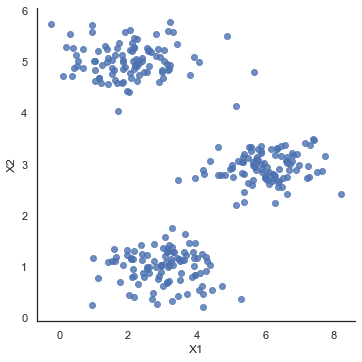

In [33]:
data2 = pd.DataFrame(data.get('X'),columns=['X1','X2'])
print(data2.head())

sb.set(context="notebook",style="white")
sb.lmplot('X1','X2',data=data2, fit_reg=False)
plt.show()

In [35]:
def compute_centroids(X,idx,k):
    m, n =X.shape
    centroids = np.zeros((k,n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:],
                          axis=1)/len(indices[0])).ravel()

    return centroids
print(compute_centroids(X,idx,3))

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


This output also matches what is expected in the exercise.

The next section involves actually running the algorithm for some iterations and visualizing the results. This step is because it's not complicated, I'm going to build it from scratch. To run the algorithm, we just need to assign the samples to the nearest clusters and recalculate the cluster centers of the clusters.

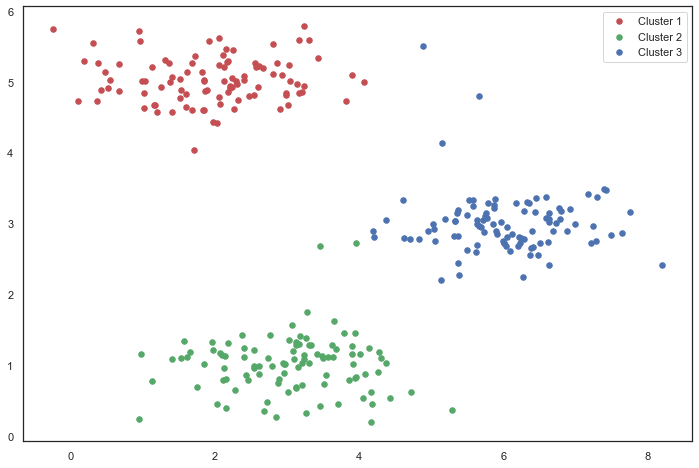

In [38]:
def run_k_means(X,initial_centroids,max_iters):
    m, n =X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)

    return idx, centroids
idx, centroids = run_k_means(X,initial_centroids,10)
cluster1 = X[np.where(idx ==0)[0],:]
cluster2 = X[np.where(idx ==1)[0],:]
cluster3 = X[np.where(idx ==2)[0],:]

fig, ax =plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g',label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',label='Cluster 3')
ax.legend()
plt.show()